In [1]:
print("kernel is ready")

kernel is ready

┌ Info: Saved animation to 
│   fn = /jh-sharedNotebooks/fluidFlowDemonstration/cornerPotentialFlow/ResultSquare.gif
└ @ Plots /usr/share/julia/packages/Plots/Xnzc7/src/animation.jl:104


Plots.AnimatedGif("/jh-sharedNotebooks/fluidFlowDemonstration/cornerPotentialFlow/ResultSquare.gif")
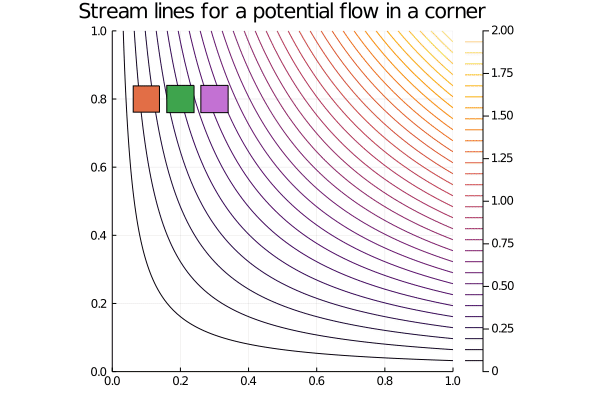

In [2]:
# USAGE: 
# Dt dt is the time intervals 
# NTIME: Number of time steps 
# RESOLUTION: Number of nodes
# TO ADD Marker (+) go to the "ADD MARKER HERE" section Down in the main function
# By Alireza Ghavaminia

const DT = 0.001
const NTIME = 10000
const RESOLUTION = 101

using Plots

mutable struct markerCorners
    xs1
    xf1
    ys1
    yf1
    xs2
    xf2
    ys2
    yf2
end

mutable struct marker
    x
    y
    lx
    ly
end
marker(x,y) = marker(x, y, 0.08, 0.08)

function U(x,y)
    Cx = 2.0
    return Cx*x
end

function V(x,y)
    Cy = -2.0
    return Cy * y
end

function createFeild(Nx, Ny, xmin, xmax, ymin, ymax)

    u = Array{Float64}(undef,Nx,Ny)
    v = Array{Float64}(undef,Ny,Ny)
    s = Array{Float64}(undef,Nx,Ny)

    x = xmin:(xmax-xmin)/(Nx-1):xmax
    y = ymin:(ymax-ymin)/(Ny-1):ymax

    for j = 1:size(y,1)
        for i = 1:size(x,1)
            u[i,j] = U(x[i],y[j])
            v[i,j] = V(x[i],y[j])
        end
    end
    for j = 1:size(y,1)
        for i = 1:size(x,1)
            s[i,j] = sqrt(u[i,j]^2 + v[i,j]^2)
        end
    end
    return x, y, u, v, s
end

function makeMarker(x0, y0, Lx, Ly)
    # s1 --> p1
    # f1 --> p2
    # s2 --> p3
    # f2 --> p4
    xs1 = x0 + Lx/2
    xf1 = x0 - Lx/2
    ys1 = y0 + Ly/2
    yf1 = y0 + Ly/2

    xs2 = x0 - Lx/2
    xf2 = x0 + Lx/2
    ys2 = y0 - Ly/2
    yf2 = y0 - Ly/2
    return markerCorners(xs1, xf1, ys1, yf1, xs2, xf2, ys2, yf2)
end

function moveMarker!(m::markerCorners,dt)
    dxs1 = U(m.xs1,m.ys1) * dt
    dxf1 = U(m.xf1,m.yf1) * dt
    dys1 = V(m.xs1,m.ys1) * dt
    dyf1 = V(m.xf1,m.yf1) * dt
    m.xs1 = m.xs1 + dxs1
    m.xf1 = m.xf1 + dxf1
    m.ys1 = m.ys1 + dys1 
    m.yf1 = m.yf1 + dyf1

    dxs2 = U(m.xs2,m.ys2) * dt
    dxf2 = U(m.xf2,m.yf2) * dt
    dys2 = V(m.xs2,m.ys2) * dt
    dyf2 = V(m.xf2,m.yf2) * dt
    m.xs2 = m.xs2 + dxs2
    m.xf2 = m.xf2 + dxf2
    m.ys2 = m.ys2 + dys2 
    m.yf2 = m.yf2 + dyf2
    return m
end

function plotMarker!(p,m)
    Plots.plot!(p,Plots.Shape([m.xs1,m.xf1,m.xs2,m.xf2,m.xs1],[m.ys1,m.yf1,m.ys2,m.yf2,m.ys1]),legend = false)
end
function inBorder(xmin, xmax, ymin, ymax, n)
    for m in n
        x = [m.xs1 m.xf1 m.xs2 m.xf2]
        for i in x 
            if i > xmax || i < xmin 
                return false
            end
        end
        y = [m.ys1 m.yf1 m.ys2 m.yf2]
        for i in y
            if i < ymin || i > ymax
                return false
            end
        end
    end
    return true
end

function siFeild(x,y,A)
    Nx = size(x,1)
    Ny = size(y,1)
    si = Array{Float64}(undef,Nx,Ny)
    for j = 1:Ny
        for i = 1:Nx
            si[i,j] = 2*A*x[i]*y[j]
        end
    end
    return si
end
function main()
    N = RESOLUTION
    Cx = 2.0
    Cy = -2.0
    Nx = N
    Ny = N
    xmin = 0.0
    ymin = 0.0
    xmax = 1.0
    ymax = 1.0
    
    x, y, u, v, s = createFeild(Nx, Ny, xmin, xmax, ymin, ymax)    
    si = siFeild(x,y,1)

    markers = []
    # ====================== ADD MARKERS HERE =================
    # marker(x,y,lenght in x direction, length in y direction)
    push!(markers,marker(0.1, 0.8, 0.077, 0.077)) # example with length
    push!(markers,marker(0.2, 0.8)) # example with default length
    push!(markers,marker(0.3, 0.8))
    # push!(markers,marker(0.645, 0.8))
    # =========================================================

    m = []
    for i in markers
        push!(m,makeMarker(i.x, i.y, i.lx, i.ly))
    end

    dt = DT
    anim = @animate for nt = 0 : NTIME
        p1 = Plots.contour(x, y, si,
         fill = false, 
         legend = true ,
         xlims = (xmin,xmax),
         ylims = (ymin, ymax),
         aspect_ratio = :equal,
         title = "Stream lines for a potential flow in a corner",
         framestyle = [:box],
         levels = 30)

        for i = 1:size(m,1)
            n = m[i]
            plotMarker!(p1, n)
            moveMarker!(n, dt)
        end

        if !inBorder(xmin, xmax, ymin, ymax, m)
            break
        end
    end
    gif(anim, "ResultSquare.gif", fps = 40)
    # return si
end


s = main()
